### Support Vector Machines Example 5.1
If the response is a factor containing more than two levels, then the **svm.SVC()** function will perform multi-class classification using the one-versus-one approach. We explore that setting here by generating a third class of observations. 

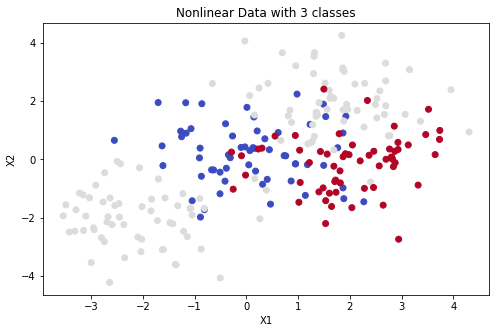

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create nonlinear data
n = 120
np.random.seed(0) 
# x from normal distribution # y is 0, 1, 2
x = np.random.normal(scale = 1.0, size = (2*n, 2)) 
y = np.concatenate((np.zeros(int(1/2*n)), 
                    np.ones(int(2/2*n)), 2*np.ones(int(1/2*n)))) 

x[:int(n/2), :] += 0
x[int(n/2):int(n*2/2), :] -= 2
x[int(n*2/2):int(n*3/2), :] += 2
x[int(n*3/2):, 0] += 2

fig = plt.figure(figsize=[8, 5])

# Create scatter plot data
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(x[:,0], x[:,1], c=y, cmap=cm.coolwarm,  marker="o")

plt.xlabel("X1"), plt.ylabel("X2")
plt.title("Nonlinear Data with 3 classes")
plt.show()

We now fit an SVM to the data:

Number of Support Vectors:  148


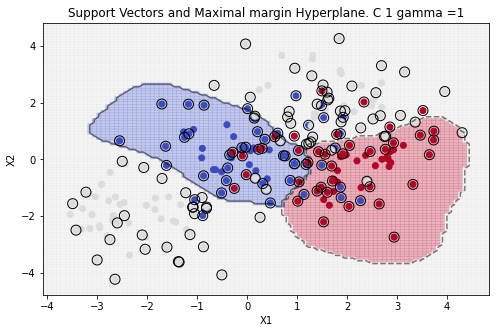

In [2]:
""" Fit radial kernel on 3 classes """
# Create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 100) 

c, gamma = 1, 1
clf = svm.SVC(kernel='rbf', C=c, gamma=gamma, probability=True)
clf.fit(x, y)
Z = clf.predict(xy).reshape(xx.shape)

# plot model
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 

plt.pcolor(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3, 
           edgecolors='face', shading='auto')

svm_def.svm_plot(ax, x, y, Z, clf)

title = ("Support Vectors and Maximal margin Hyperplane. C " + str(c) 
         + " gamma =" + str(gamma))
plt.title(title)

print("Number of Support Vectors: ", len(clf.support_))

plt.show()